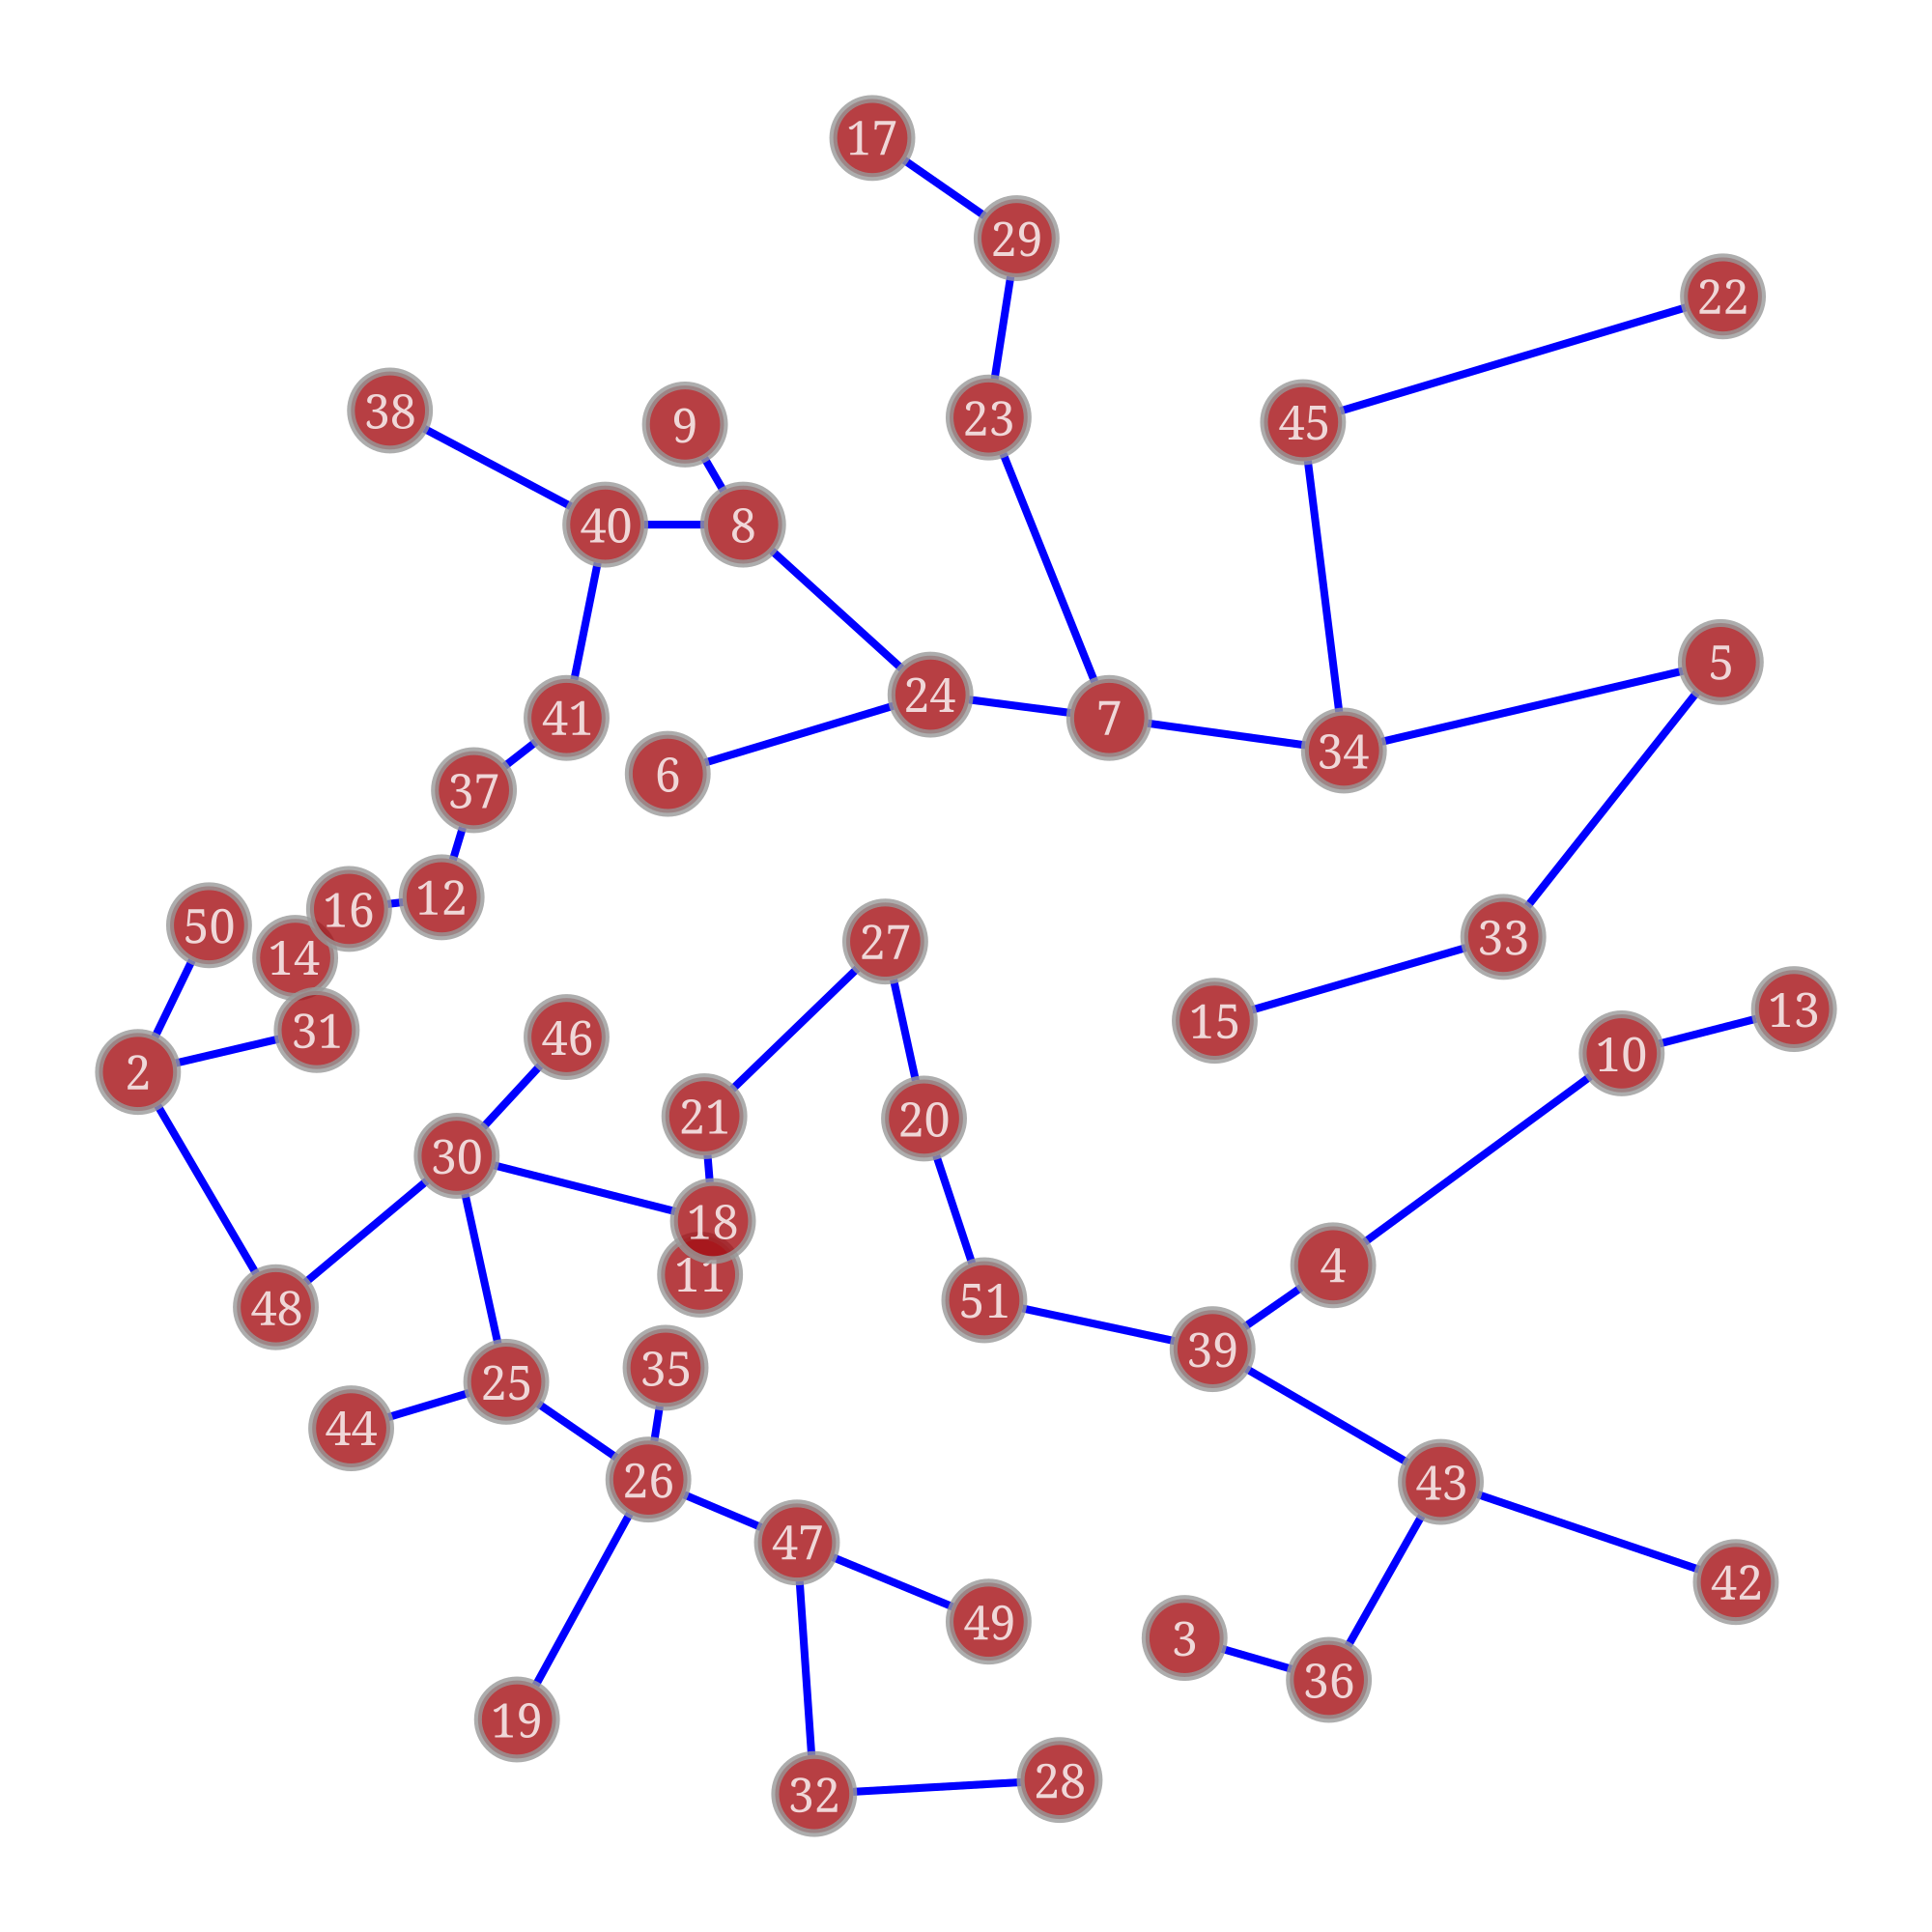

Number of edges after adding MST and random edges: 69


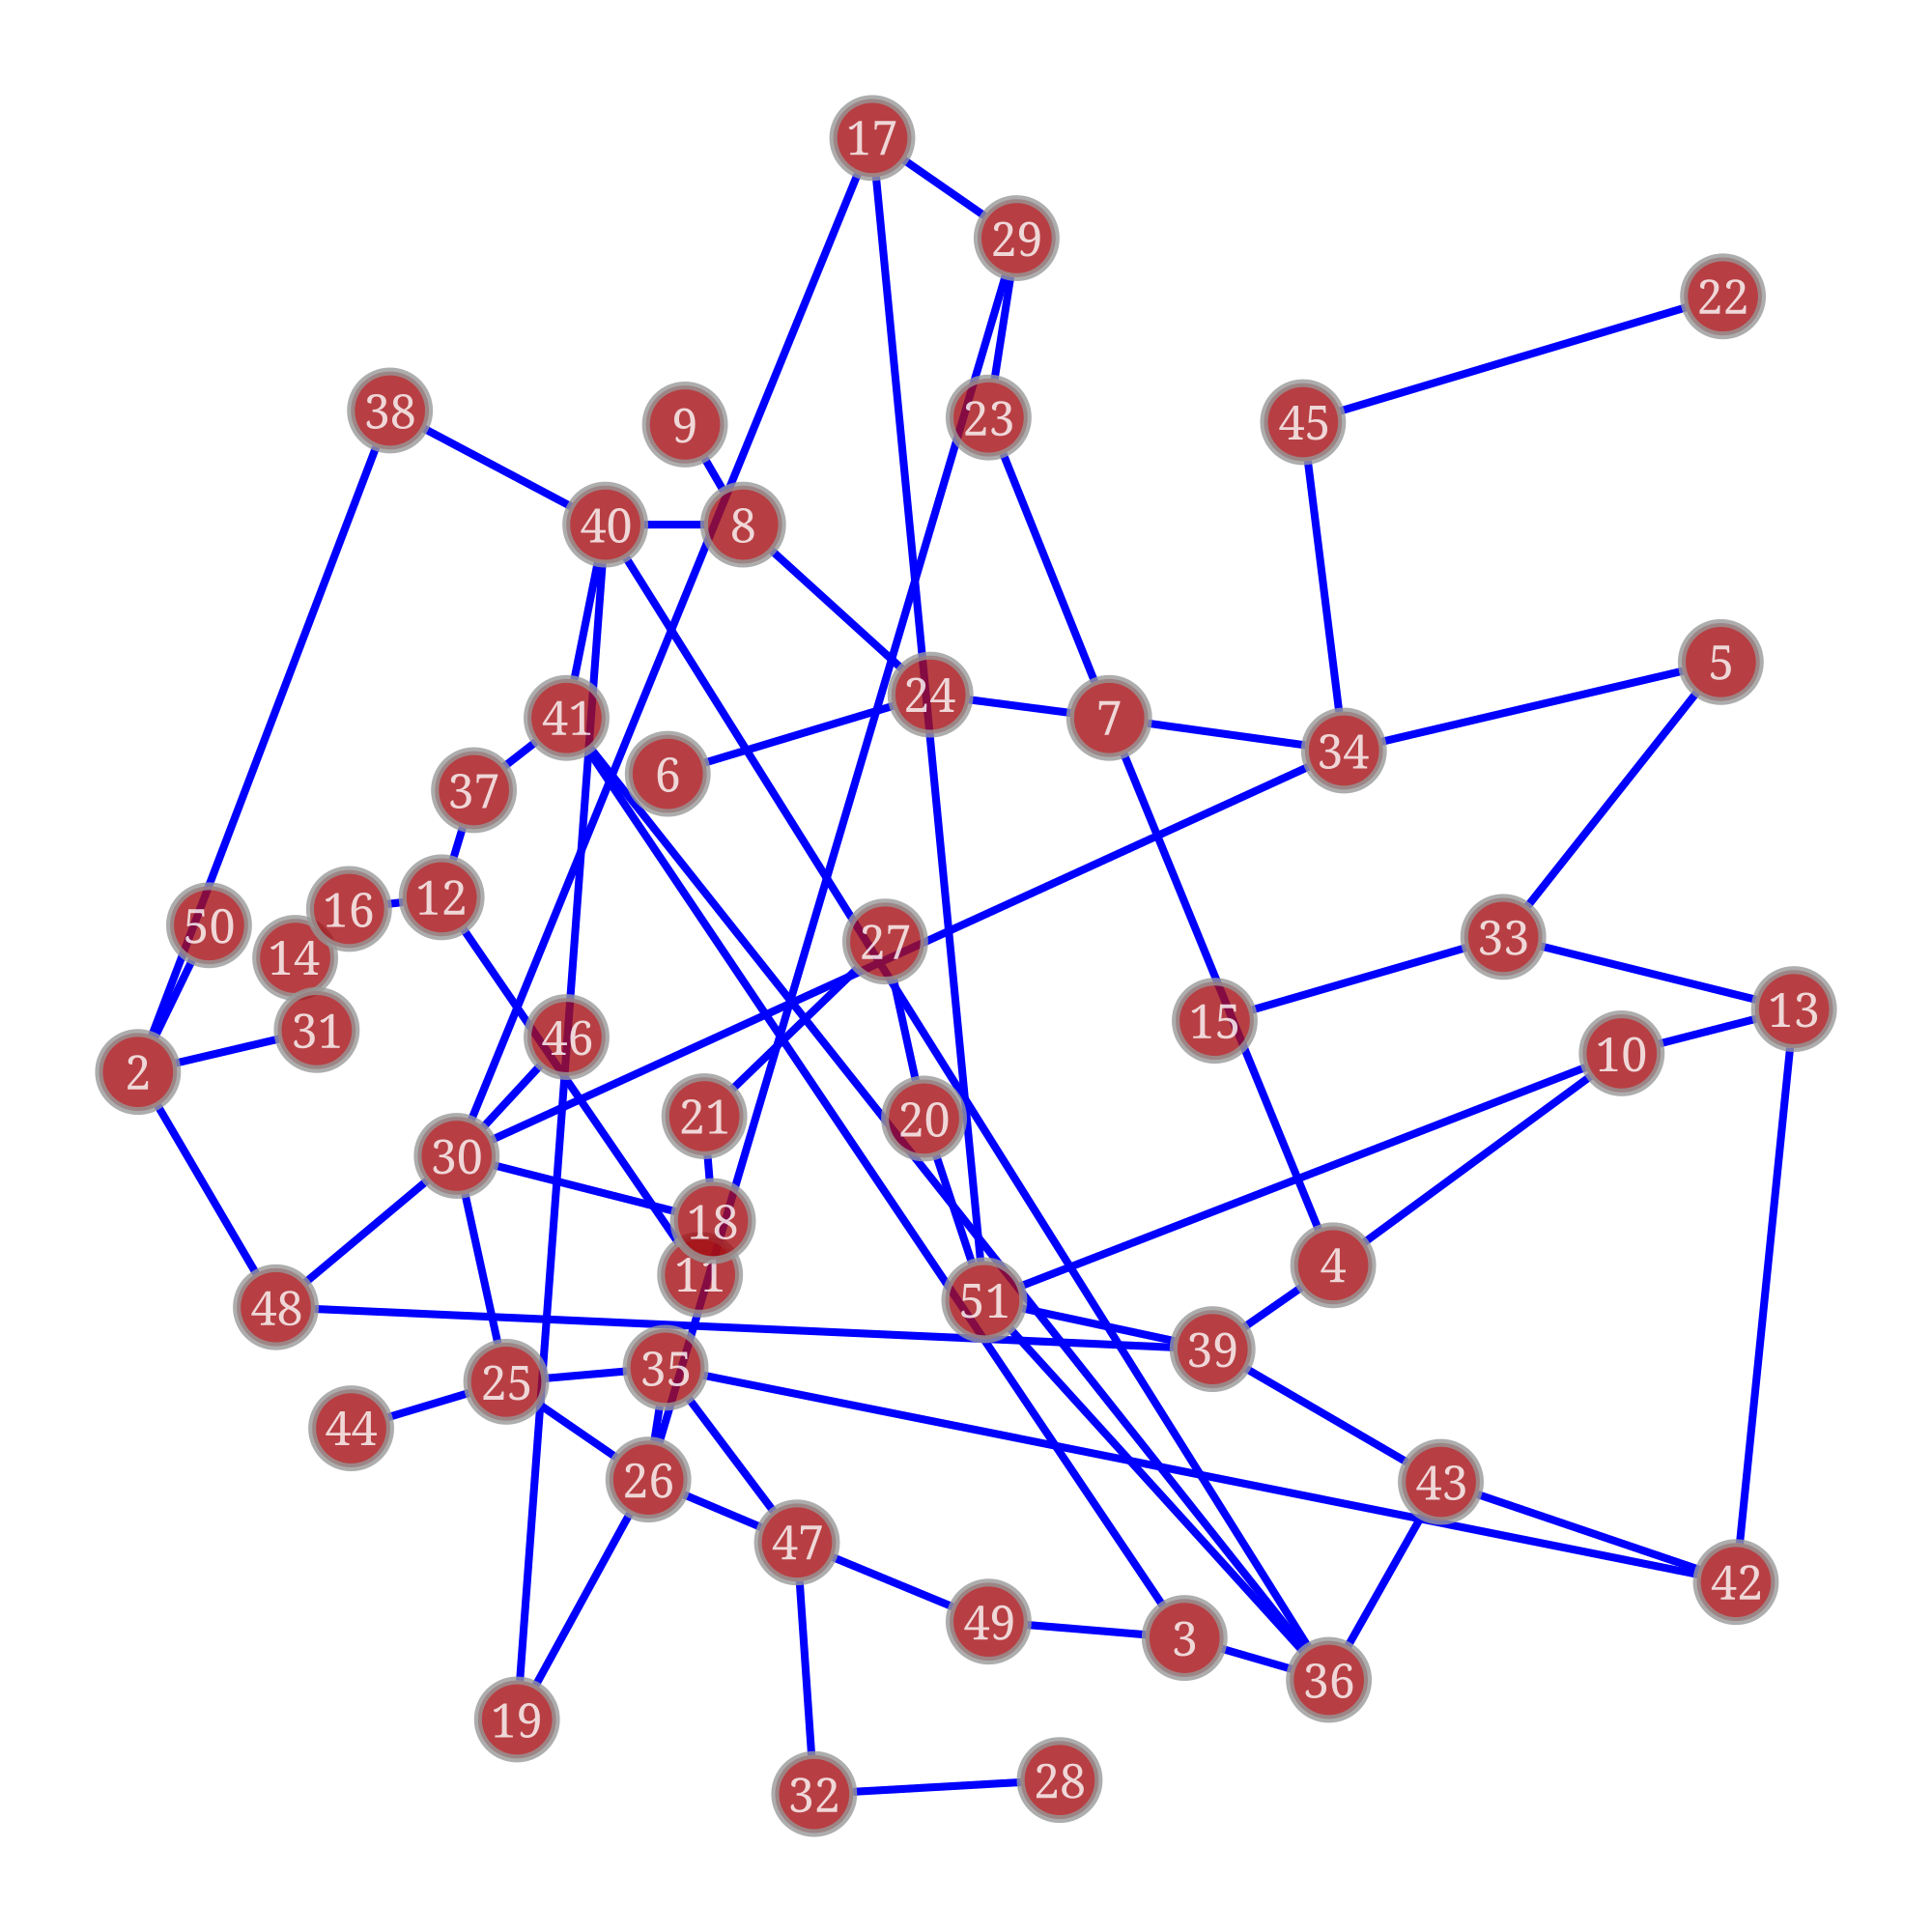

Generation 0: Best fitness = 9656
Current population fitness: [9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9656, 9

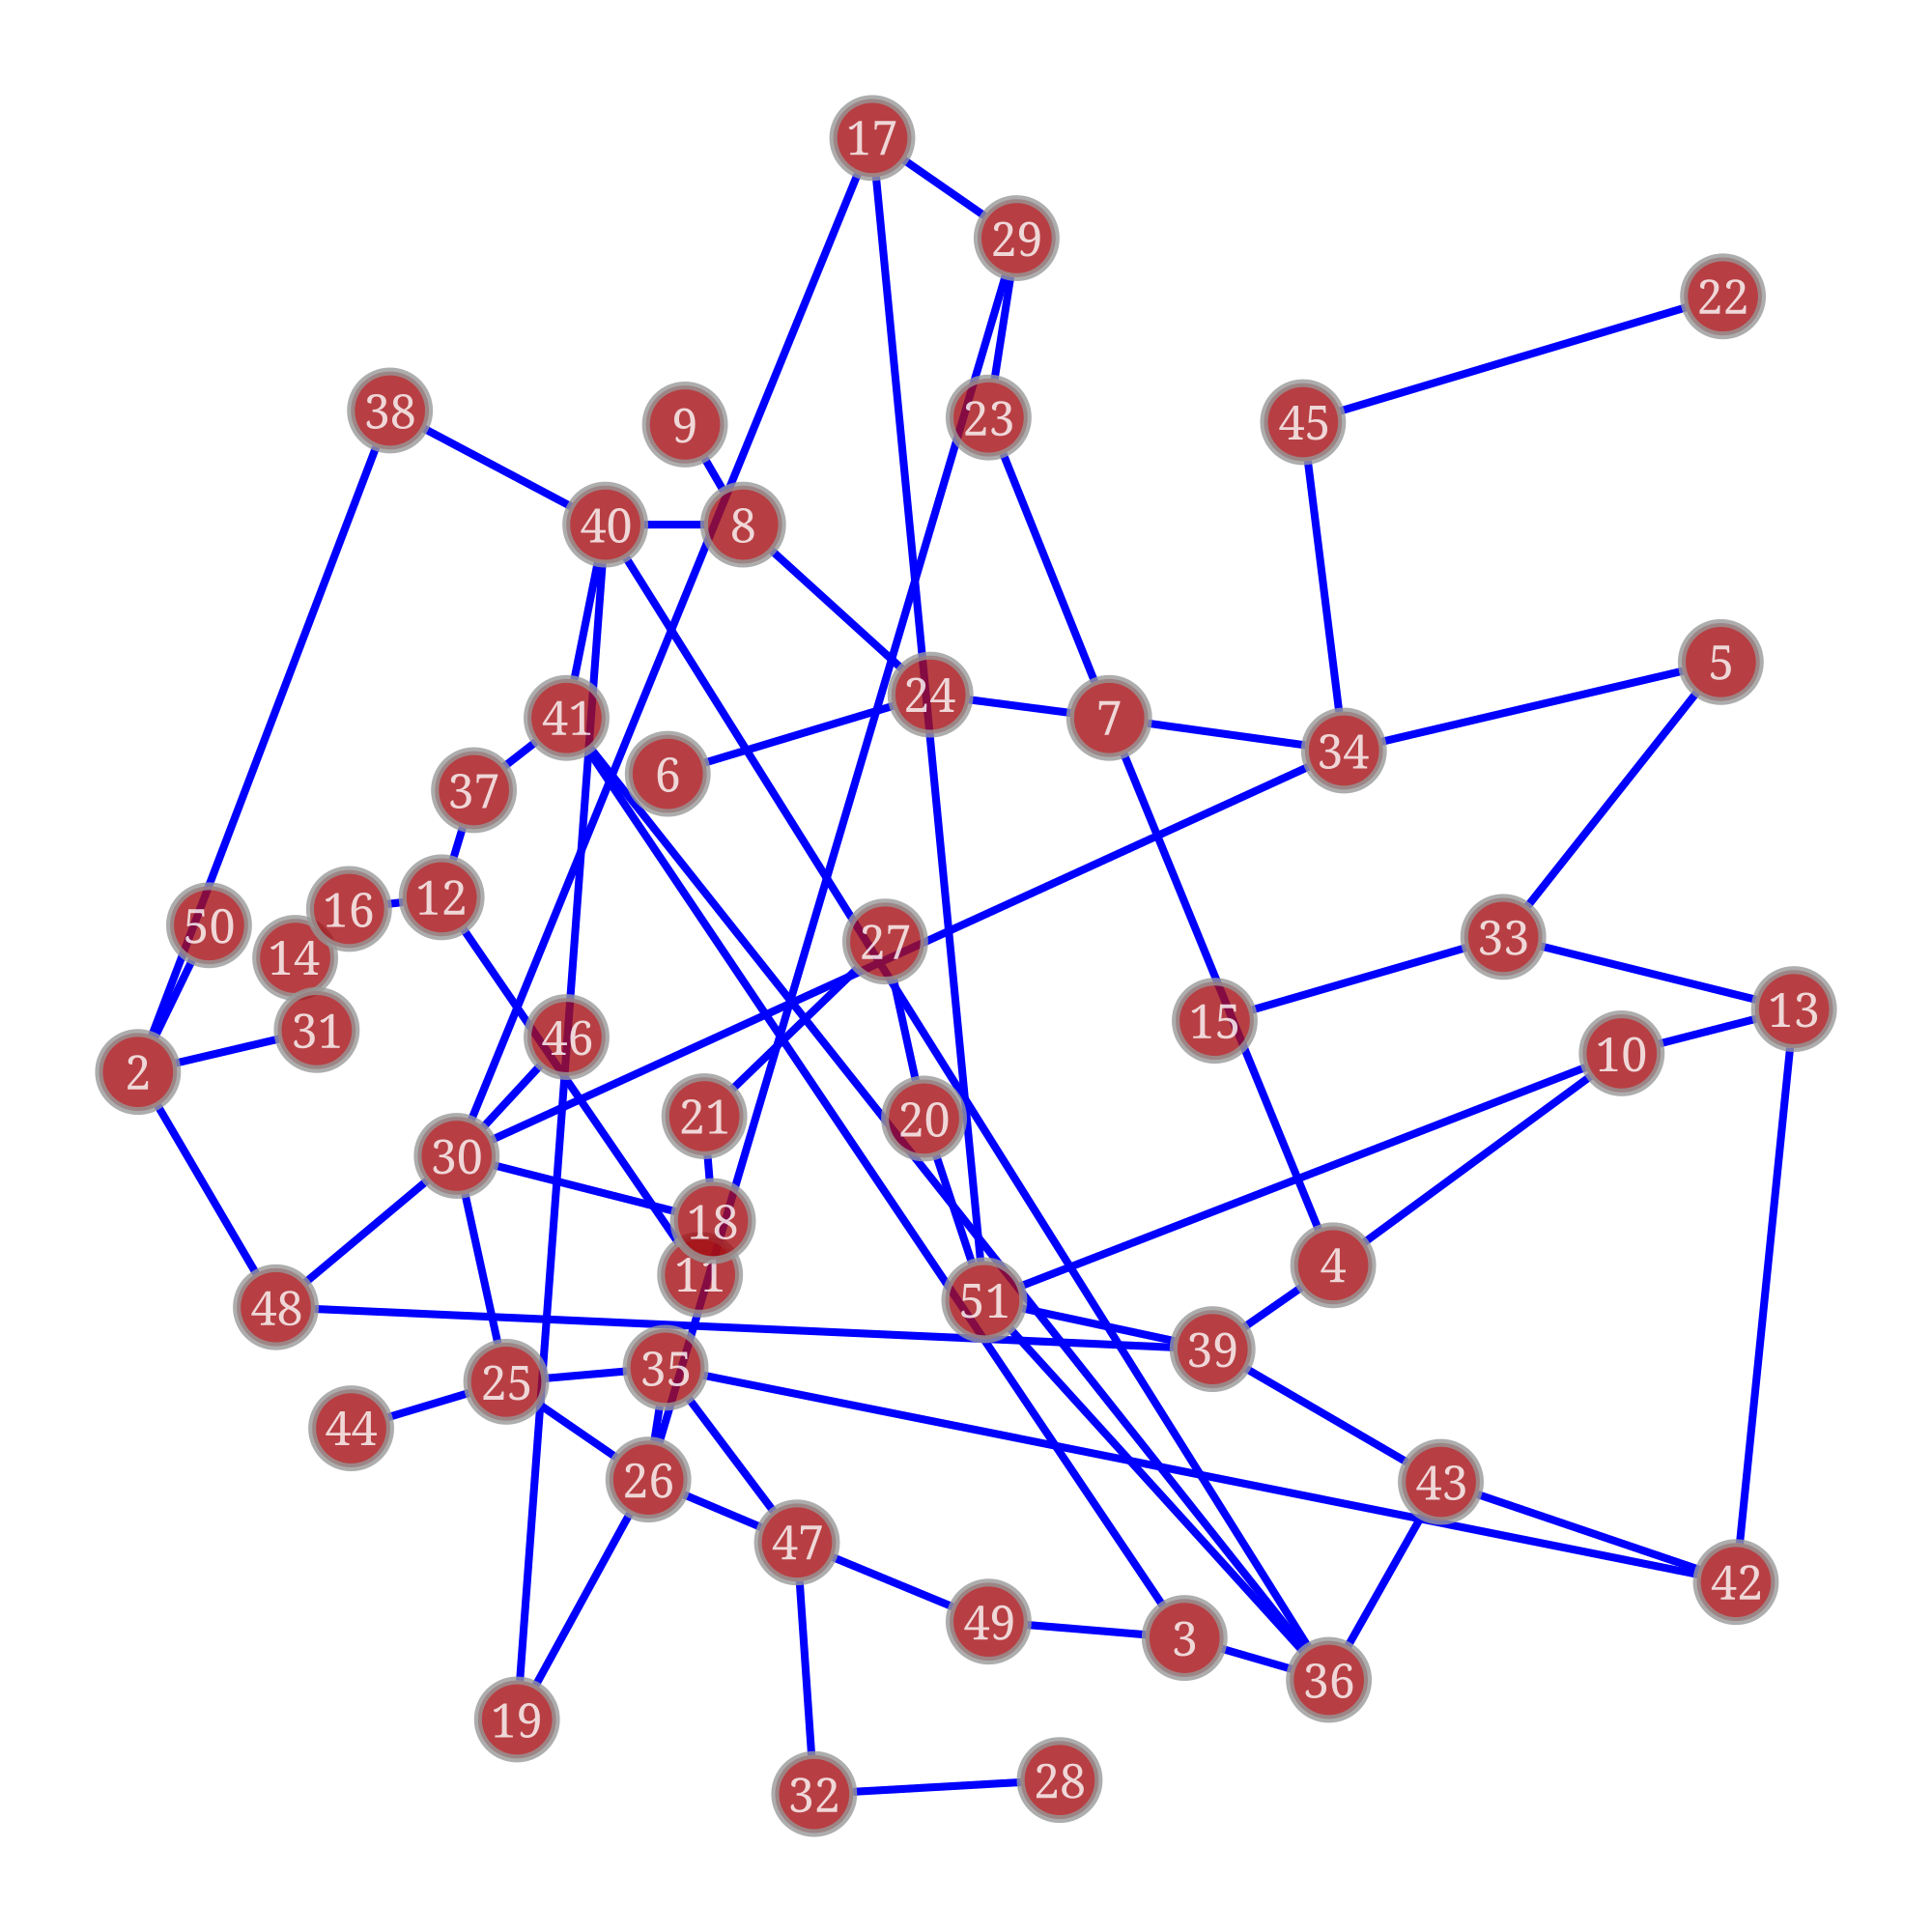

<VertexPropertyMap object with value type 'vector<double>', for Graph 0x76277f7aba10, at 0x76277f74fc80>

In [1]:
from graph_tool.all import graph_draw
import python_codes.files_operators
import random
import python_codes.graph_utils

# 步骤1: 读取图和位置信息 / ステップ1: グラフと位置情報を読み込む
filename1 = "Germany50"
read_graph, read_pos = python_codes.files_operators.read_files(f"../networks_clusters/{filename1}.net")

# 步骤2: 找到最小生成树 (MST) / ステップ2: 最小全域木 (MST) を見つける
mst, mst_pos, edge_color_map, existing_edges = python_codes.graph_utils.create_mst(read_graph, read_pos)

# 绘制最小生成树的网络图像 / 最小全域木のネットワーク画像を描く
graph_draw(mst, mst_pos, vertex_text=mst.vertex_properties["number"], edge_color="blue", output_size=(1000, 1000))

# 步骤3: 向MST添加20条随机边 / ステップ3: MSTに20本のランダムなエッジを追加する
python_codes.graph_utils.add_random_edges(mst, 20, existing_edges)

# 检查添加MST和随机边之后的边数 / MSTとランダムなエッジを追加した後のエッジの数を確認する
print("Number of edges after adding MST and random edges:", mst.num_edges())
assert mst.num_edges() == 69, f"The graph does not have exactly 69 edges after initial random edges. It has {mst.num_edges()} edges."

# 绘制加入20条随机边后的网络图像 / 20本のランダムなエッジを追加した後のネットワーク画像を描く
graph_draw(mst, mst_pos, vertex_text=mst.vertex_properties["number"], edge_color="blue", output_size=(1000, 1000))

# 遗传算法参数设置 / 遺伝アルゴリズムのパラメータ設定
NGEN = 50  # 迭代次数 / 繰り返し回数
CXPB = 0.8  # 交叉概率 / 交叉確率
MUTPB = 0.5  # 变异概率 / 変異確率

# 步骤4: 遗传算法设置 / ステップ4: 遺伝アルゴリズムの設定
edge_list = [(int(e.source()), int(e.target())) for e in mst.edges()]
toolbox = python_codes.graph_utils.setup_ga_toolbox(edge_list)

# 创建初始种群 / 初期個体群を作成する
population_size = 200
population = python_codes.graph_utils.create_initial_population(toolbox, population_size, edge_list)

# 运行遗传算法 / 遺伝アルゴリズムを実行する
best_ind, best_fitness = python_codes.graph_utils.run_genetic_algorithm(toolbox, population, read_graph, NGEN, CXPB, MUTPB)
print("Best fitness:", best_fitness)

# 根据最佳个体和最佳种子构建优化后的图 / 最良個体と最良の種子を用いて最適化されたグラフを構築する
optimized_graph = python_codes.graph_utils.create_optimized_graph(read_graph, best_ind)

# 绘制优化后的网络图像 / 最適化されたネットワーク画像を描く
graph_draw(optimized_graph, mst_pos, vertex_text=optimized_graph.vertex_properties["number"], edge_color="blue", output_size=(1000, 1000))
